Zero-dimensional tensor: tf.Tensor(20, shape=(), dtype=int32)
One-dimensional tensor: tf.Tensor([12 20 53 26 11 56], shape=(6,), dtype=int32)
Two-dimensional tensor: tf.Tensor(
[[ 3  6  7  5]
 [ 9  2  3  4]
 [ 7  1 10  6]
 [ 0  8 11  2]], shape=(4, 4), dtype=int32)


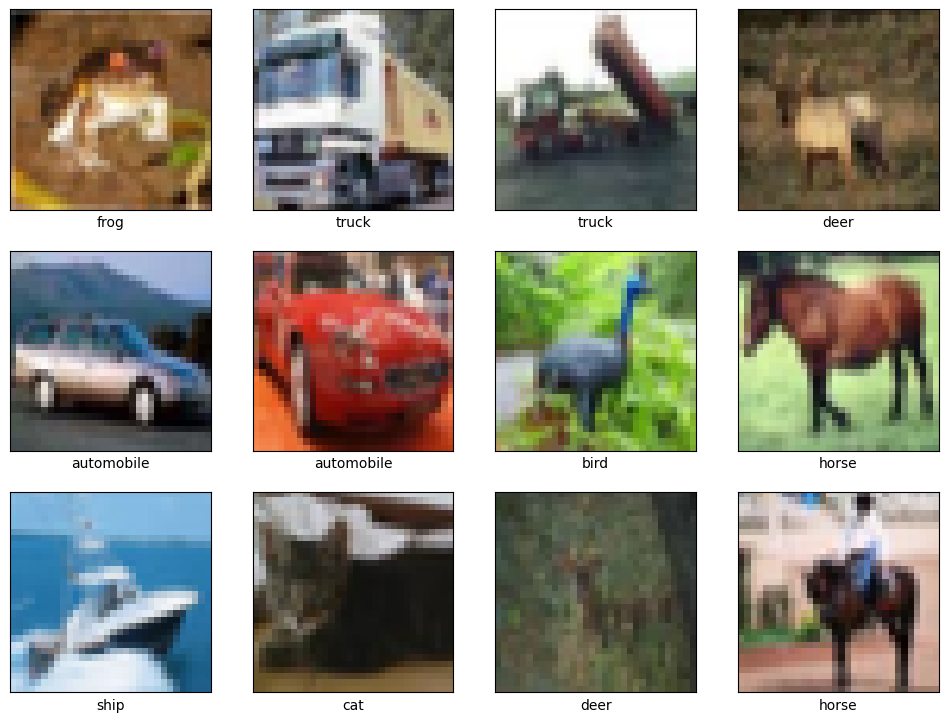

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3910 - loss: 1.6714 - precision: 0.6417 - recall: 0.1439 - val_accuracy: 0.5893 - val_loss: 1.1628 - val_precision: 0.7605 - val_recall: 0.3946
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6033 - loss: 1.1262 - precision: 0.7566 - recall: 0.4395 - val_accuracy: 0.6407 - val_loss: 1.0327 - val_precision: 0.7642 - val_recall: 0.5027
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6693 - loss: 0.9516 - precision: 0.7891 - recall: 0.5466 - val_accuracy: 0.6733 - val_loss: 0.9436 - val_precision: 0.7755 - val_recall: 0.5683
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.8348 - precision: 0.8051 - recall: 0.6071 - val_accuracy: 0.6747 - val_loss: 0.9569 - val_precision: 0.7633 - val_recall: 0.5911
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7375 - loss: 0.7505 - precision: 0.8275 - recall: 0.6519 - val_accuracy: 0.6852

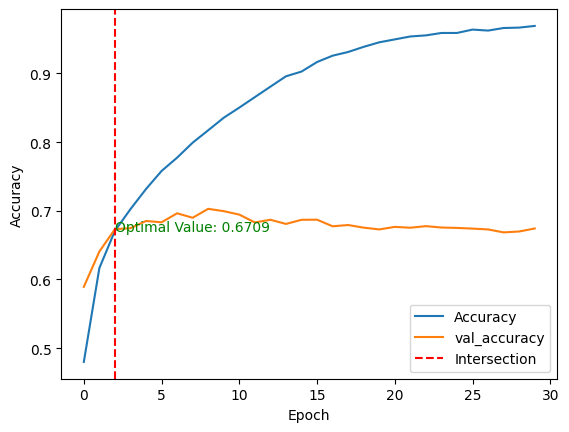

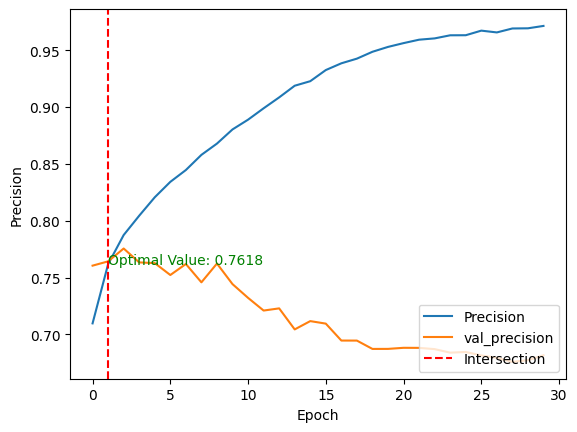

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


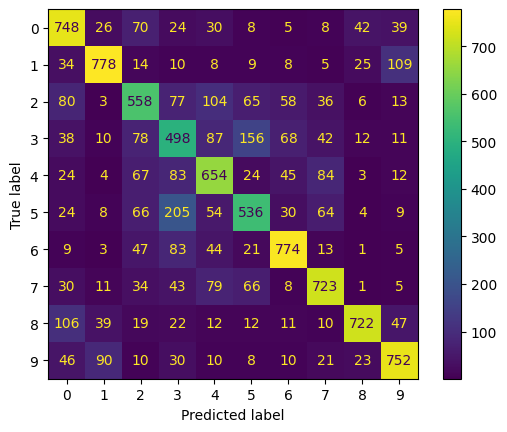

In [10]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Definición de tensores
# Tensor de dimensión cero (escalar)
zero_dim_tensor = tf.constant(20)
print("Zero-dimensional tensor:", zero_dim_tensor)

# Tensor de una dimensión (vector)
one_dim_tensor = tf.constant([12, 20, 53, 26, 11, 56])
print("One-dimensional tensor:", one_dim_tensor)

# Tensor de dos dimensiones (matriz)
two_dim_array = [
    [3, 6, 7, 5],
    [9, 2, 3, 4],
    [7, 1, 10, 6],
    [0, 8, 11, 2]
]
two_dim_tensor = tf.constant(two_dim_array)
print("Two-dimensional tensor:", two_dim_tensor)

# Cargar el conjunto de datos CIFAR-10
# CIFAR-10 contiene imágenes clasificadas en 10 categorías, y se divide en conjuntos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Definir función para mostrar algunas imágenes de CIFAR-10
def show_images(train_images, class_names, train_labels, nb_samples=12, nb_row=4):
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

# Nombres de las clases para CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar algunas imágenes de entrenamiento con sus etiquetas
show_images(train_images, class_names, train_labels)

# Preprocesamiento de datos
# Escalado de imágenes a valores entre 0 y 1
max_pixel_value = 255
train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

# Convertir etiquetas a formato categórico (one-hot encoding)
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

# Configuración de la arquitectura del modelo
# Definir constantes de configuración para el modelo CNN
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Crear la arquitectura del modelo
model = Sequential([
    Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE),
    MaxPooling2D(POOL_SHAPE),
    Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'),
    MaxPooling2D(POOL_SHAPE),
    Flatten(),
    Dense(FULLY_CONNECT_NUM, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Configuración de entrenamiento
BATCH_SIZE = 32
EPOCHS = 30

# Métricas para monitorear durante el entrenamiento
METRICS = [
    'accuracy',
    Precision(name='precision'),
    Recall(name='recall')
]

# Compilar el modelo con el optimizador, función de pérdida y métricas especificadas
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

# Entrenamiento del modelo
# Guardar el historial del entrenamiento para análisis posterior
training_history = model.fit(
    train_images, train_labels,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(test_images, test_labels)
)

# Función para mostrar curvas de rendimiento durante el entrenamiento
def show_performance_curve(training_result, metric, metric_label):
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_' + str(metric)]
    
    # Encontrar el punto de intersección entre las curvas de entrenamiento y validación
    intersection_idx = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2)).flatten()[0]
    intersection_value = train_perf[intersection_idx]
    
    # Graficar las curvas
    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label='val_' + str(metric))
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    plt.annotate(f'Optimal Value: {intersection_value:.4f}', xy=(intersection_idx, intersection_value),
                 xycoords='data', fontsize=10, color='green')
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')
    plt.show()

# Mostrar las curvas de rendimiento para precisión y precisión
show_performance_curve(training_history, 'accuracy', 'Accuracy')
show_performance_curve(training_history, 'precision', 'Precision')

# Realizar predicciones sobre el conjunto de prueba
test_predictions = model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(test_true_labels, test_predicted_labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal')
plt.show()
